# 프로젝트 (1) load_digits : 손글씨 분류




In [1]:
# 라이브러리 버전확인
import sklearn
print(sklearn.__version__)

1.2.2


### (1) 필요한 모듈 import 하기

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비

In [3]:
# 로드된 digits 데이터셋을 digits라는 변수에 할당
digits = load_digits() 

# digits객체가 어떤 변수와 메서드를 갖는지 나열
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


### (3) 데이터 이해하기

In [4]:
# 데이터셋에 담긴 정보 종류 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

1. Feature data 지정

In [5]:
# key 에서 확인한 정보 중, data를 따로 digits_data 변수에 할당
digits_data = digits.data
print(digits.data.shape)
# 총 1797개의 데이터, 각 데이터는 64개의 숫자로 이루어짐

(1797, 64)


In [6]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

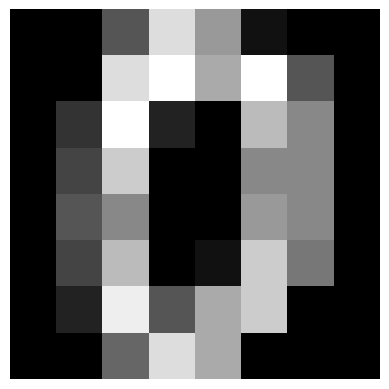

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

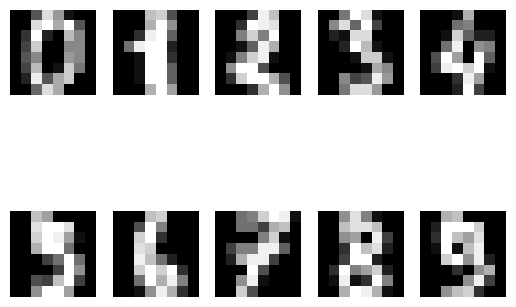

In [8]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray')
    plt.axis('off')
plt.show()

2. Label data 지정

In [9]:
# 출력해야 하는 정답인 타겟정보 라벨 변수에 할당
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

3. Target Names 출력

In [10]:
# 타겟의 이름 확인. 이미지의 숫자에 해당하는 숫자가 표기되어 있음.
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

4. 데이터 describe

In [11]:
# digits.data에 있는 이미지의 인덱싱이 들어있는 듯 함.
digits.feature_names[:3]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2']

### (4) train, test 데이터 분리

In [12]:
import pandas as pd
print(pd.__version__)

1.5.3


In [13]:
# digits_data의 데이터 타입 확인
type(digits_data)

numpy.ndarray

In [14]:
# train_test_split이용한 학습데이터와 테스트 데이터 분리
# digits_data : 나눌 data (문제지)
# digits_label : 데이터의 라벨 (답안지)
# test_size : 위 두 항목을 각각 8:2 비율로 잘라서 학습(테스트)데이터의 x, y에 할당

X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state = 15)

In [15]:
print('X_train 개수:', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수: 1437 , X_test 개수:  360


In [16]:
# train의 형상정보 확인
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [17]:
# test의 형상정보 확인
X_test.shape, y_test.shape

((360, 64), (360,))

In [18]:
# label이 무작위로 섞인 채 잘 분리 되었는지 확인
y_train, y_test

(array([6, 4, 3, ..., 8, 8, 6]),
 array([9, 4, 4, 1, 2, 6, 4, 2, 5, 1, 5, 6, 8, 6, 6, 6, 4, 6, 1, 3, 3, 5,
        2, 6, 7, 5, 4, 3, 7, 3, 9, 0, 4, 6, 8, 7, 1, 8, 7, 9, 8, 0, 4, 9,
        3, 8, 7, 6, 7, 2, 8, 9, 3, 1, 2, 8, 6, 4, 8, 4, 2, 9, 5, 0, 9, 5,
        8, 3, 4, 4, 6, 4, 9, 0, 0, 3, 2, 4, 4, 5, 2, 7, 1, 6, 3, 1, 3, 1,
        2, 0, 7, 2, 5, 0, 5, 2, 9, 2, 9, 7, 0, 1, 0, 1, 6, 3, 8, 8, 2, 7,
        8, 3, 9, 7, 1, 3, 4, 6, 0, 6, 9, 6, 5, 1, 2, 9, 2, 5, 0, 6, 8, 8,
        2, 4, 7, 6, 4, 7, 7, 9, 6, 5, 9, 2, 1, 6, 6, 6, 9, 0, 9, 5, 1, 8,
        7, 2, 9, 4, 1, 6, 8, 8, 8, 9, 2, 4, 0, 5, 5, 0, 3, 2, 5, 4, 8, 4,
        1, 2, 0, 7, 9, 7, 4, 1, 8, 0, 2, 4, 5, 1, 9, 6, 8, 2, 5, 6, 6, 5,
        2, 5, 7, 6, 5, 0, 5, 2, 8, 3, 4, 8, 1, 4, 2, 4, 1, 0, 7, 3, 4, 8,
        8, 9, 1, 2, 4, 4, 4, 1, 2, 4, 9, 1, 9, 2, 1, 6, 6, 4, 4, 9, 9, 1,
        0, 6, 5, 9, 4, 5, 7, 0, 9, 5, 2, 7, 9, 5, 9, 9, 5, 0, 7, 9, 7, 6,
        2, 5, 5, 8, 7, 8, 7, 6, 2, 2, 8, 5, 7, 1, 1, 1, 3, 0, 2, 3, 1, 7,
     

### (5) 다양한 모델로 학습

In [19]:
# 정답이 있는 문제에 대해 학습하는 것이므로 지도학습
#  입력받은 데이터를 특정 카테고리 중 하나로 분류하는 문제이므로 분류 학습에 해당함.

In [20]:
# 필요한 모듈 로드
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_classifier(y_test, y_pred, roc = False):
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average = 'macro'): .4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average = 'macro'): .4f}")
    print(f"F_SCORE: {f1_score(y_test, y_pred, average = 'macro'): .4f}")
    if roc:
        print(f"ROC_AUC: {roc_auc_score(y_test, y_pred, average = 'macro', multi_class = 'ovr'): .4f}")
    print(classification_report(y_test, y_pred))

1. Decision Tree 모델

In [22]:
# 의사결정트리모델 import 후, 난수 초기값 15로 설정하여 모델을 변수에 할당
decision_tree = DecisionTreeClassifier(random_state = 15)
print(decision_tree._estimator_type)

classifier


In [23]:
# 의사결정 트리모델로 트레인 데이터 학습!
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

In [24]:
# 테스트 데이터로 예측!
# X_test데이터로 predict실행하면 모델이 예측한 y_pred를 얻음
y_pred = decision_tree.predict(X_test)
y_pred

array([9, 4, 4, 1, 2, 6, 9, 2, 5, 2, 5, 6, 5, 6, 6, 2, 4, 6, 1, 5, 2, 5,
       2, 6, 7, 5, 4, 3, 7, 6, 9, 0, 4, 6, 9, 7, 1, 8, 7, 9, 8, 0, 4, 9,
       3, 8, 7, 4, 7, 2, 2, 9, 3, 1, 2, 8, 6, 7, 8, 4, 2, 9, 5, 0, 1, 5,
       3, 3, 4, 4, 1, 4, 8, 0, 0, 3, 2, 4, 4, 5, 2, 7, 1, 6, 3, 1, 3, 1,
       2, 2, 7, 5, 5, 0, 5, 2, 1, 2, 2, 7, 0, 1, 0, 1, 6, 3, 8, 8, 8, 7,
       8, 3, 9, 7, 1, 1, 4, 6, 0, 6, 9, 6, 5, 1, 2, 5, 2, 7, 0, 6, 9, 8,
       2, 6, 7, 6, 4, 3, 7, 2, 6, 5, 9, 2, 1, 6, 6, 6, 5, 0, 9, 5, 3, 8,
       7, 8, 3, 4, 1, 6, 8, 8, 8, 9, 2, 4, 0, 5, 5, 0, 3, 2, 5, 4, 8, 4,
       1, 2, 0, 7, 9, 7, 4, 3, 2, 0, 2, 4, 5, 4, 9, 2, 8, 2, 5, 6, 6, 5,
       2, 5, 7, 6, 5, 0, 5, 2, 8, 3, 4, 8, 1, 4, 9, 4, 1, 0, 9, 3, 4, 8,
       8, 9, 1, 2, 4, 4, 4, 1, 2, 4, 9, 1, 9, 2, 1, 6, 6, 4, 3, 9, 9, 1,
       0, 6, 5, 9, 4, 5, 7, 0, 9, 5, 3, 7, 9, 5, 3, 9, 5, 8, 7, 1, 7, 6,
       2, 5, 5, 8, 7, 2, 7, 6, 2, 2, 8, 2, 7, 1, 1, 6, 3, 0, 2, 3, 1, 7,
       6, 2, 6, 9, 5, 3, 7, 9, 9, 1, 5, 0, 5, 3, 8,

In [25]:
# 정답 데이터와 비교해서 얼마나 맞았는지 확인
y_test

array([9, 4, 4, 1, 2, 6, 4, 2, 5, 1, 5, 6, 8, 6, 6, 6, 4, 6, 1, 3, 3, 5,
       2, 6, 7, 5, 4, 3, 7, 3, 9, 0, 4, 6, 8, 7, 1, 8, 7, 9, 8, 0, 4, 9,
       3, 8, 7, 6, 7, 2, 8, 9, 3, 1, 2, 8, 6, 4, 8, 4, 2, 9, 5, 0, 9, 5,
       8, 3, 4, 4, 6, 4, 9, 0, 0, 3, 2, 4, 4, 5, 2, 7, 1, 6, 3, 1, 3, 1,
       2, 0, 7, 2, 5, 0, 5, 2, 9, 2, 9, 7, 0, 1, 0, 1, 6, 3, 8, 8, 2, 7,
       8, 3, 9, 7, 1, 3, 4, 6, 0, 6, 9, 6, 5, 1, 2, 9, 2, 5, 0, 6, 8, 8,
       2, 4, 7, 6, 4, 7, 7, 9, 6, 5, 9, 2, 1, 6, 6, 6, 9, 0, 9, 5, 1, 8,
       7, 2, 9, 4, 1, 6, 8, 8, 8, 9, 2, 4, 0, 5, 5, 0, 3, 2, 5, 4, 8, 4,
       1, 2, 0, 7, 9, 7, 4, 1, 8, 0, 2, 4, 5, 1, 9, 6, 8, 2, 5, 6, 6, 5,
       2, 5, 7, 6, 5, 0, 5, 2, 8, 3, 4, 8, 1, 4, 2, 4, 1, 0, 7, 3, 4, 8,
       8, 9, 1, 2, 4, 4, 4, 1, 2, 4, 9, 1, 9, 2, 1, 6, 6, 4, 4, 9, 9, 1,
       0, 6, 5, 9, 4, 5, 7, 0, 9, 5, 2, 7, 9, 5, 9, 9, 5, 0, 7, 9, 7, 6,
       2, 5, 5, 8, 7, 8, 7, 6, 2, 2, 8, 5, 7, 1, 1, 1, 3, 0, 2, 3, 1, 7,
       6, 2, 6, 9, 5, 3, 7, 9, 3, 8, 5, 0, 5, 3, 3,

In [26]:
# 정답 y_test와 예측값 y_pred 비교하여 정확도 측정
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8444444444444444

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.84      0.82      0.83        38
           2       0.73      0.87      0.80        38
           3       0.71      0.74      0.73        27
           4       0.94      0.80      0.87        41
           5       0.87      0.94      0.90        35
           6       0.87      0.89      0.88        38
           7       0.91      0.94      0.93        34
           8       0.79      0.77      0.78        35
           9       0.80      0.77      0.79        43

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.85       360



In [28]:
evaluate_classifier(y_test, y_pred)

Accuracy:  0.8444
Precision:  0.8482
Recall:  0.8451
F_SCORE:  0.8450
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.84      0.82      0.83        38
           2       0.73      0.87      0.80        38
           3       0.71      0.74      0.73        27
           4       0.94      0.80      0.87        41
           5       0.87      0.94      0.90        35
           6       0.87      0.89      0.88        38
           7       0.91      0.94      0.93        34
           8       0.79      0.77      0.78        35
           9       0.80      0.77      0.79        43

    accuracy                           0.84       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.85      0.84      0.85       360



2. Random Forest 모델

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=15)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.97      0.97      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.95      0.98      0.96        41
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        38
           7       0.97      1.00      0.99        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



In [30]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.975

3. SVM 모델

In [31]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [32]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [33]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9833333333333333

4. SGD Classifier

In [34]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [35]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.88      0.97      0.93        38
           2       1.00      0.97      0.99        38
           3       0.93      0.96      0.95        27
           4       0.95      0.98      0.96        41
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        38
           7       0.94      1.00      0.97        34
           8       0.86      0.89      0.87        35
           9       1.00      0.86      0.92        43

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9527777777777777

5. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [38]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.98      1.00      0.99        41
           5       0.97      0.97      0.97        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.92      0.97      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



C:\Users\SJang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.975

# (6) 모델 평가하기

#### 1) Accuracy

* 정확히 예측한 수/ 전체 샘플 수

* 단점 예시) 내일 서울 에 시간단 1m 이상의 눈이 내릴지 여부를 예측한다고 가정. 무조건 Negative를 예측하면 이 분류기는 99.9 % 의 정확도를 나타냄. 그정도 눈이 내리는 날은 거의 없으니까. 즉, 이 분류기는 정답을 TN만 잔뜩 맞히고 TP는 하나도 발견하지 못한것. 

* 이렇게 실제 데이터에 Negative 비율이 너무 높아서 희박한 가능성으로 발생할 상황에 대해 제대로 된 분류를 해주는지 평가해줄 지표는 Recall 이다.

#### 2) Recall (재현율)

* 양성으로 분류된 샘플 수 / 전체 양성 샘플 수
* 실제 True인 것 중에서 모델이 True로 예측한 비율. 
* 애초에 True가 발생하는 확률이 적을 때 사용하면 좋음.

* 예시) 시간당 1m 이상의 눈이 내릴지 예측하는 과제에 적절. 실제로 눈이 내린 날짜 중 몇 개나 맞히는지 확인할 수 있으므로. 만약 언제나 False로 예측하는 분류기가 있다면 정확도는 99%를 넘기겠지만, TP를 찾을 수 없으니 recall이 0이 됨.

* 단점 예시) 시간당 적설량 1m 이상이 될지 분류하는 과제에서 언제나 True만 답하는 분류기가 있다고 가정. 정확도는 낮지만, 눈이 많이 온 날에 대해서만큼은 저확하게 맞힐 수 있기 때문에 recall은 1이 됨. 이 또한 말이 안되는 지표임.

* 이럴때 해당 알고리즘에 결함이 있음을 나타내는 지표는 precision임.

#### 3) Precision (정밀도)

* 진짜 양성 샘플 수/양성으로 예측된 샘플 수
* 모델이 True라고 분류한 것 중 실제 True인 것의 비율
* 분류기가 눈이 많이 내릴거라고 예측한 날 중, 실제로 눈이 많이 내린 날의 비율
* Recall과 Precision은 서로 상충하는 개념

판별된 숫자가 어디에 어떻게 쓰이느냐에 따라 판별요소들의 중요도가 달라지는 것 같다. 
 예) 주차장을 들어가는 자동차의 번호표를 읽을 때, 경찰이 범인의 차번호를 조회할때 등등

상황들을 고려해봤을 때, 정밀도와 재현율을 적절히 고려한 f1_score모델이 적합하다고 생각된다. 때문에 숫자판별 프로젝트에서는 SVM 모델이 적합한 것으로 보인다.

In [40]:
evaluate_classifier(y_test, y_pred)

Accuracy:  0.9750
Precision:  0.9753
Recall:  0.9743
F_SCORE:  0.9746
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.98      1.00      0.99        41
           5       0.97      0.97      0.97        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.92      0.97      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



# 프로젝트 (2) load_wine : 와인 분류

In [41]:
from sklearn.datasets import load_wine

In [42]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [43]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [44]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [45]:
wine.target_names
# target의 이름이 class-0, 1, 2로 되어있음.

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [46]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [47]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

In [48]:
wine_data = wine.data
print(wine_data.shape)
type(wine_data)
# 178개의 데이터가 각각 13개의 feature정보를 담고 있음.

(178, 13)


numpy.ndarray

In [49]:
wine_label = wine.target

print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### data frame 만들기_data, feature_name, label 포함

In [50]:
wine_df = pd.DataFrame(data = wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [51]:
# label을 df 컬럼에 추가
wine_df["label"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 학습 데이터와 테스트 데이터 나누기

In [52]:
x_train, x_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=7)

print('x_train 개수: ', len(x_train), ',x_test 개수: ', len(x_test))

x_train 개수:  142 ,x_test 개수:  36


In [53]:
x_train.shape, x_test.shape

((142, 13), (36, 13))

In [54]:
y_train.shape, y_test.shape

((142,), (36,))

In [55]:
# 랜덤하게 잘 섞여서 나뉘어졌는지 확인
y_train, y_test

(array([2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1,
        0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2,
        1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1,
        1, 1, 0, 2, 1, 1, 2, 1, 0, 2]),
 array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
        1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1]))

### 학습시키기 (지도학습, 분류)

1. Decision tree

In [56]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[2 0 2 2 1 2 1 0 1 1 0 1 1 1 1 1 1 2 0 0 0 1 1 1 0 2 1 2 2 2 1 0 2 1 1 1]
0.9166666666666666
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      0.94      0.91        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



2. Support Vector Machine (SVM)

In [57]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 2 1 1 1 2 1 1 1 2]
0.6111111111111112
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



3. Stochastic Gradient Descent Classifier (SGDClassifier)

In [58]:
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[0 0 0 2 1 2 1 0 2 2 0 1 2 2 1 1 0 2 0 0 0 2 1 1 0 2 1 0 1 0 1 0 1 1 1 2]
0.6666666666666666
              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       0.85      0.65      0.73        17
           2       0.60      0.50      0.55        12

    accuracy                           0.67        36
   macro avg       0.66      0.72      0.66        36
weighted avg       0.70      0.67      0.66        36



4. Logistic Regression

In [59]:
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[2 0 2 2 1 2 1 0 1 2 0 1 2 1 1 1 1 2 0 0 1 1 1 1 0 2 1 2 2 2 1 1 2 1 1 1]
0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



C:\Users\SJang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5. Random Forest

In [60]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[2 0 2 2 1 2 1 0 1 2 0 1 2 1 1 1 1 2 0 0 1 1 1 1 0 2 1 2 2 2 1 0 2 1 1 1]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 모델 평가하기

f1-score는 정밀도와 재현율을 조합하여 만든 지표로, 분류 모델의 최종 성능 평가 지표로 적합하다고 생각한다.

Random Forest 모델이 모든 평가지표로 봤을 때 가장 높은 값을 갖는다(..?) 무튼 f1-score가 가장 높은 Random Forest모델이 와인 분류용 모델로 적합하다고 여겨진다.

# 프로젝트 (3) breast_cancer : 유방암 여부 진단

In [61]:
from sklearn.datasets import load_breast_cancer

### 데이터 준비

In [62]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [63]:
print(cancer.data)
cancer_data = cancer.data
print(cancer.data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [64]:
print(cancer.target)
cancer_label = cancer.target
print(cancer_label.shape)

# 기다 아니다 1, 0 로 분류됨

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [65]:
cancer.target_names

# 1이면 malignant (악성종양)
# 0이면 benign (양성종양)

array(['malignant', 'benign'], dtype='<U9')

In [66]:
cancer.feature_names

#  DataFrame의 컬럼으로 지정하면 좋을 듯

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [67]:
cancer.filename

'breast_cancer.csv'

In [68]:
cancer.data_module

'sklearn.datasets.data'

In [69]:
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [70]:
# target 컬럼에 추가

In [71]:
cancer_df["label"] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### 데이터셋 분리하기

In [72]:
x_train, x_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size = 0.2, random_state = 15)

In [73]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [74]:
y_train.shape, y_test.shape

((455,), (114,))

In [75]:
y_train, y_test

(array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### 모델 학습 시작! (지도학습, 분류)

1. Decision Tree

In [76]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1
 0 0 1]
0.9473684210526315
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



2. Random Forest

In [77]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1
 0 0 1]
0.9298245614035088
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



 3. svm

In [78]:
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 0 1]
0.868421052631579
              precision    recall  f1-score   support

           0       0.93      0.67      0.78        39
           1       0.85      0.97      0.91        75

    accuracy                           0.87       114
   macro avg       0.89      0.82      0.84       114
weighted avg       0.88      0.87      0.86       114



4. SGDClass

In [79]:
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 0 0 1]
0.8245614035087719
              precision    recall  f1-score   support

           0       0.95      0.51      0.67        39
           1       0.80      0.99      0.88        75

    accuracy                           0.82       114
   macro avg       0.87      0.75      0.77       114
weighted avg       0.85      0.82      0.81       114



5. Logistic Regression

In [80]:
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0
 0 0 1]
0.8947368421052632
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.92      0.92      0.92        75

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



C:\Users\SJang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 모델 평가하기

In [81]:
# roc_auc_score ()

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.8830769230769231


암에 걸렸는지 안걸렸는지 분류하는 모델의 경우, 실제 암인 사람들을 놓치지 않고
파악하는게 중요하므로 재현율 (Recall)이 더 중요한 평가 지표라고 생각한다.

가장 높은 Recall 값을 갖는 모델은 Decision tree 모델이므로,
암진단에 가장 적합한 모델은 Decision Tree 모델이라고 볼 수 있다.